In [122]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
clean_city_data_df=pd.read_csv(city_data_to_load)
ride_data_df=pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combo_df=pd.merge(clean_city_data_df,ride_data_df, how="inner", on="city")


# Display the data table for preview
combo_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

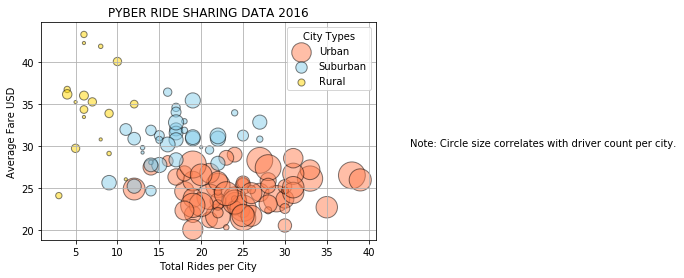

In [135]:
# Obtain the x and y coordinates for each of the three city types


#seperate into urban/rural/etc. here
city_data_df=combo_df[["city","type", "fare", "driver_count"]].copy()
urban_data_df=city_data_df.loc[city_data_df["type"]=="Urban"]
suburban_data_df=city_data_df.loc[city_data_df["type"]=="Suburban"]
rural_data_df=city_data_df.loc[city_data_df["type"]=="Rural"]

urban_grouped_pd=urban_data_df.groupby(["city"])
suburban_grouped_pd=suburban_data_df.groupby(["city"])
rural_grouped_pd=rural_data_df.groupby(["city"])
urban_grouped_pd

#counting the things that need counting
urban_ride_count=urban_grouped_pd["city"].count()
suubrban_ride_count=suburban_grouped_pd["city"].count()
rural_ride_count=rural_grouped_pd["city"].count()   

urban_fare_sum=urban_grouped_pd["fare"].sum()
suburban_fare_sum=suburban_grouped_pd["fare"].sum()
rural_fare_sum=rural_grouped_pd["fare"].sum()

urb_average_fare=urban_fare_sum/urban_ride_count
suburb_average_fare=suburban_fare_sum/suubrban_ride_count
rural_average_fare=rural_fare_sum/rural_ride_count

#driver numbers need to be come from an unmerged dataframe or things get complicated
#so reloading from the original dataset
city_driver_df=pd.read_csv(city_data_to_load)
urban_data_df=city_driver_df.loc[city_driver_df["type"]=="Urban"]
suburban_data_df=city_driver_df.loc[city_driver_df["type"]=="Suburban"]
rural_data_df=city_driver_df.loc[city_driver_df["type"]=="Rural"]

#truning that into variables for scatter plot
urb_driver_count=urban_data_df["driver_count"]
suburb_driver_count=suburban_data_df["driver_count"]
rurl_driver_count=rural_data_df["driver_count"]

# starting sctter plots
urban=plt.scatter(urban_ride_count, urb_average_fare, facecolors="coral", edgecolors="black", s=10*urb_driver_count, alpha=0.5, label="Urban")
suburban=plt.scatter(suubrban_ride_count, suburb_average_fare, facecolors="skyblue", edgecolors="black", s=10*suburb_driver_count, alpha=0.5, label="Suburban")
rural=plt.scatter(rural_ride_count, rural_average_fare, facecolors="gold", edgecolors="black", s=10*rurl_driver_count, alpha=0.5, label="Rural")

# Incorporate the other graph properties
plt.title("PYBER RIDE SHARING DATA 2016")
plt.xlabel("Total Rides per City")
plt.ylabel("Average Fare USD")
plt.grid()

# Create a legend
plt.legend(title= "City Types",handles=[urban, suburban, rural], loc="best")

# Incorporate a text label regarding circle size
plt.text(45,30, "Note: Circle size correlates with driver count per city.")

# Save Figure
plt.savefig("../Images/Pyberscatter.png")

In [127]:
#This is how I tried to get the driver counts before just getting them from the original data

urban_driver_summary_table = pd.DataFrame({"Driver Count": urban_grouped_pd["driver_count"]})
rural_driver_summary_table = pd.DataFrame({"Driver Count": rural_grouped_pd["driver_count"]})
suburban_driver_summary_table = pd.DataFrame({"Driver Count": suburban_grouped_pd["driver_count"]})
urban_driver_summary_table.head()

,Driver Count
0,"(Amandaburgh, [12, 12, 12, 12, 12, 12, 12, 12,..."
1,"(Barajasview, [26, 26, 26, 26, 26, 26, 26, 26,..."
2,"(Carriemouth, [52, 52, 52, 52, 52, 52, 52, 52,..."
3,"(Christopherfurt, [41, 41, 41, 41, 41, 41, 41,..."
4,"(Deanville, [49, 49, 49, 49, 49, 49, 49, 49, 4..."


In [72]:
# Show plot
plt.show()

## Total Fares by City Type

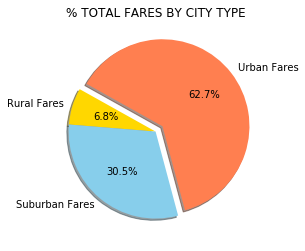

In [116]:
# Calculate Type Percents
#Have the totals by type already, so have to conver them to numbers
pi_urban_sum=urban_fare_sum.sum()
pi_suburban_sum=suburban_fare_sum.sum()
pi_rural_sum=rural_fare_sum.sum()


fare_count=[pi_urban_sum,pi_rural_sum,pi_suburban_sum]

# Build Pie Chart
labels=["Urban Fares", "Rural Fares","Suburban Fares"]
colors=["coral","gold","skyblue"]

plt.pie(fare_count, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=285)
plt.title("% TOTAL FARES BY CITY TYPE")
# Save Figure
plt.savefig("../Images/PyberFares.png")

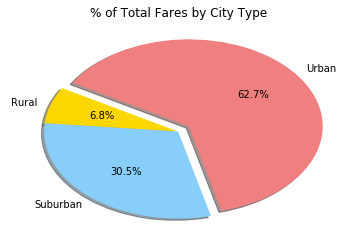

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

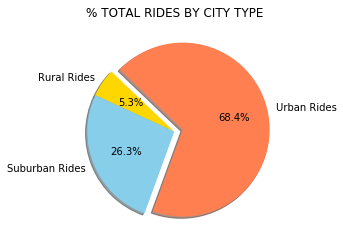

In [115]:
# Calculate Type Percents
#Have the totals by type already, so have to conver them to numbers

urban_ride_count_pi=urban_ride_count.sum()
sun_ride_count_pi=suubrban_ride_count.sum()
rurl_ride_cnt_pi=rural_ride_count.sum()
ride_count=[urban_ride_count_pi,rurl_ride_cnt_pi,sun_ride_count_pi]

# Build Pie Chart
labels=["Urban Rides", "Rural Rides","Suburban Rides"]
colors=["coral","gold","skyblue"]

plt.pie(ride_count, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=250)
plt.title("% TOTAL RIDES BY CITY TYPE")

# Save Figure
plt.savefig("../Images/PyberRIDES.png")

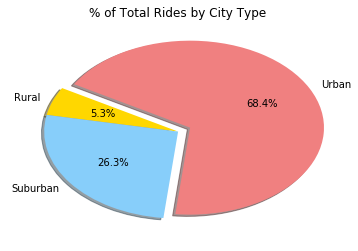

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

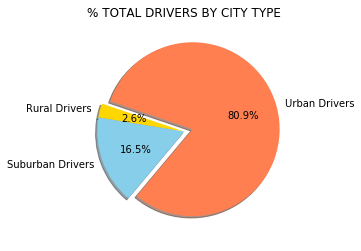

In [114]:
# Calculate Driver Percents
#The numbers are not caluculated so must be created from the original split files 
urban_drivers=urban_data_df["driver_count"].sum()
sub_drivers=suburban_data_df["driver_count"].sum()
rur_drivers=rural_data_df["driver_count"].sum()

driver_count=[urban_drivers,rur_drivers,sub_drivers]

# Build Pie Chart
labels=["Urban Drivers", "Rural Drivers","Suburban Drivers"]
colors=["coral","gold","skyblue"]

plt.pie(driver_count, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=230)
plt.title("% TOTAL DRIVERS BY CITY TYPE")

# Save Figure
plt.savefig("../Images/PyberDRIVERS.png")

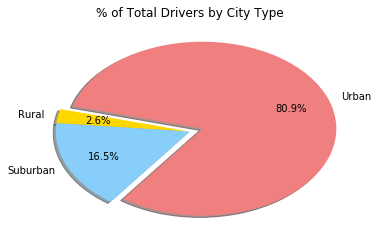

In [6]:
# Show Figure
plt.show()